# Capacity of the perceptron via the Cover's theorem (fig. 8.4)
## Author: Marylou Gabrié

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt 
import scipy.special 
import numpy as np
import seaborn as sns

In [160]:
# Import custom font
import matplotlib.font_manager as fm

path = r'D:\Repositories\lecture_notes_1st_version\fonts\Hero New Regular.otf' # for text only
custom_font = fm.FontProperties(fname=path)

In [161]:
# Import colors (as 1D and dictionary)
import pickle

# Use colors as a dictionary
infile = open('D:\Repositories\lecture_notes_1st_version\colors\colors_dict.pkl','rb')
colors_dict = pickle.load(infile)
infile.close()

# Import 1D array of colors
infile = open('D:\Repositories\lecture_notes_1st_version\colors\colors_1D.pkl','rb')
colors_1D = pickle.load(infile)
infile.close()


In [162]:
def f(N,P): 
    f = 0  
    for k in range(N): 
        f += 2 * scipy.special.comb(P-1,k) 
    return f 

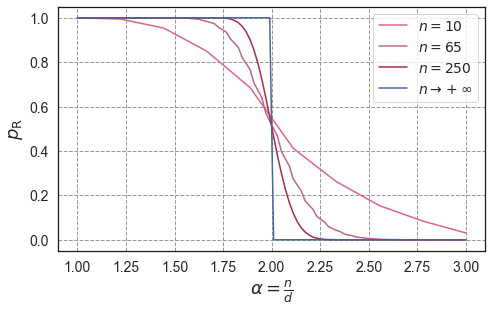

In [163]:
# Original, without cubic interpolation

colors=colors_1D[3:6]

# Seaborn style set
sns.set(style="whitegrid", rc={'figure.figsize':(7,4.5)}) # in inches
sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.6", 'axes.edgecolor': '.1'})

for n,N in enumerate([10, 65, 250]):
    if N == 10:
        alphas = np.linspace(1,3,10)
    else:
        alphas = np.linspace(1,3,100)
    frac = []
    for alpha in alphas:
        P = int(alpha * N)
        frac.append(f(N,P) / (2 ** P))
    plt.plot(alphas, frac, c=colors[2-n], label=r'$n = {:d}$'.format(N))

step = alphas < 2
plt.plot(alphas, step, color=colors_dict["blue"]["dark"], label=r'$n \, \to  \, +\infty$')
plt.xlabel(r'$\alpha = \frac{n}{d}$', size=18)
plt.ylabel(r'$p_{\mathrm{R}}$', size=18)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.legend(fontsize = 14)

plt.savefig('perceptron_capacity.pdf')

'Hero New Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


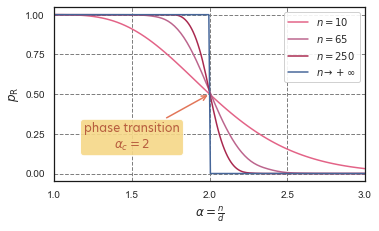

In [164]:
colors=colors_1D[3:6]

from scipy.interpolate import CubicSpline as interpol

# Seaborn style set
sns.set(style="whitegrid", rc={'figure.figsize':(5.25,3.375)}) # in inches
sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.5", 'axes.edgecolor': '.1'})

for n,N in enumerate([10, 65, 250]):
    if N == 10:
        alphas = np.linspace(1,3,11)
        alphas_to_plot = np.linspace(1,3,80)
    else:
        alphas = np.linspace(1,3,20)
        alphas_to_plot = np.linspace(1,3,200)
    frac = []
    for alpha in alphas:
        P = int(alpha * N)
        frac.append(f(N,P) / (2 ** P))
    
    spline = interpol(alphas, frac)
    plt.plot(alphas_to_plot, spline(alphas_to_plot), c=colors[2-n], label=r'$n = {:d}$'.format(N))

step = alphas_to_plot < 2
plt.plot(alphas_to_plot, step, color=colors_dict["blue"]["dark"], label=r'$n \, \to  \, +\infty$')
plt.xlabel(r'$\alpha = \frac{n}{d}$', size=12, fontproperties=custom_font)
plt.ylabel(r'$p_{\mathrm{R}}$', size=12, fontproperties=custom_font)
plt.tick_params(labelsize=10)
plt.tight_layout()
plt.legend(fontsize = 10, framealpha = 0.9)
plt.axis([1.0, 3.0, -0.05, 1.05])
plt.yticks(np.arange(0,1.1,0.25))
plt.xticks(np.arange(1,3.1,0.5))
plt.annotate('phase transition' + '\n' + r'$\alpha_c=2$', xy=(2, 0.5), va='center', ha='center', xytext=(1.5, 0.23), arrowprops=dict(arrowstyle="->", color=colors_dict['orange']['medium'],
                             lw=1.5), c=colors_dict['orange']['dark'], fontsize=12, fontproperties=custom_font, bbox=dict(boxstyle="round", fc=colors_dict['yellow']['light'], alpha=0.9))

#plt.show()
plt.savefig('perceptron_capacity.pdf')